In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

df = pd.read_csv("wine.data.csv")
df = df.dropna(how="all")
df

Label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   
..     ...      ...         ...   ...                ...        ...   
173      3    13.71        5.65  2.45               20.5         95   
174      3    13.40        3.91  2.48               23.0        102   
175      3    13.27        4.28  2.26               20.0        120   
176      3    13.17        2.59  2.37               20.0        120   
177      3    14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280  Proline  
0               5.64  1.04   3.92     1065  
1               4.38  1.05   3.40     1050  
2               5.68  1.03   3.17     1185  
3               7.80  0.86   3.45     1480  
4               4.32  1.04   2.93      735  
..               ...   ...    ...      ...  
173             7.70  0.64   1.74      740  
174             7.30  0.70   1.56      750  
175            10.20  0.59   1.56      835  
176             9.30  0.60   1.62      840  
177             9.20  0.61   1.60      560  

[178 rows x 14 columns]

In [114]:
Label = df.Label
Label

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: Label, Length: 178, dtype: int64

In [115]:
#remove Label column

df = df.drop("Label", axis = 1)
df

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  
0     3.92     1065  
1     3.40     1050  
2     3.17     1185  
3     3.45     1480  
4     2.93      735  
..     ...      ...  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560  

[178 rows x 13 columns]

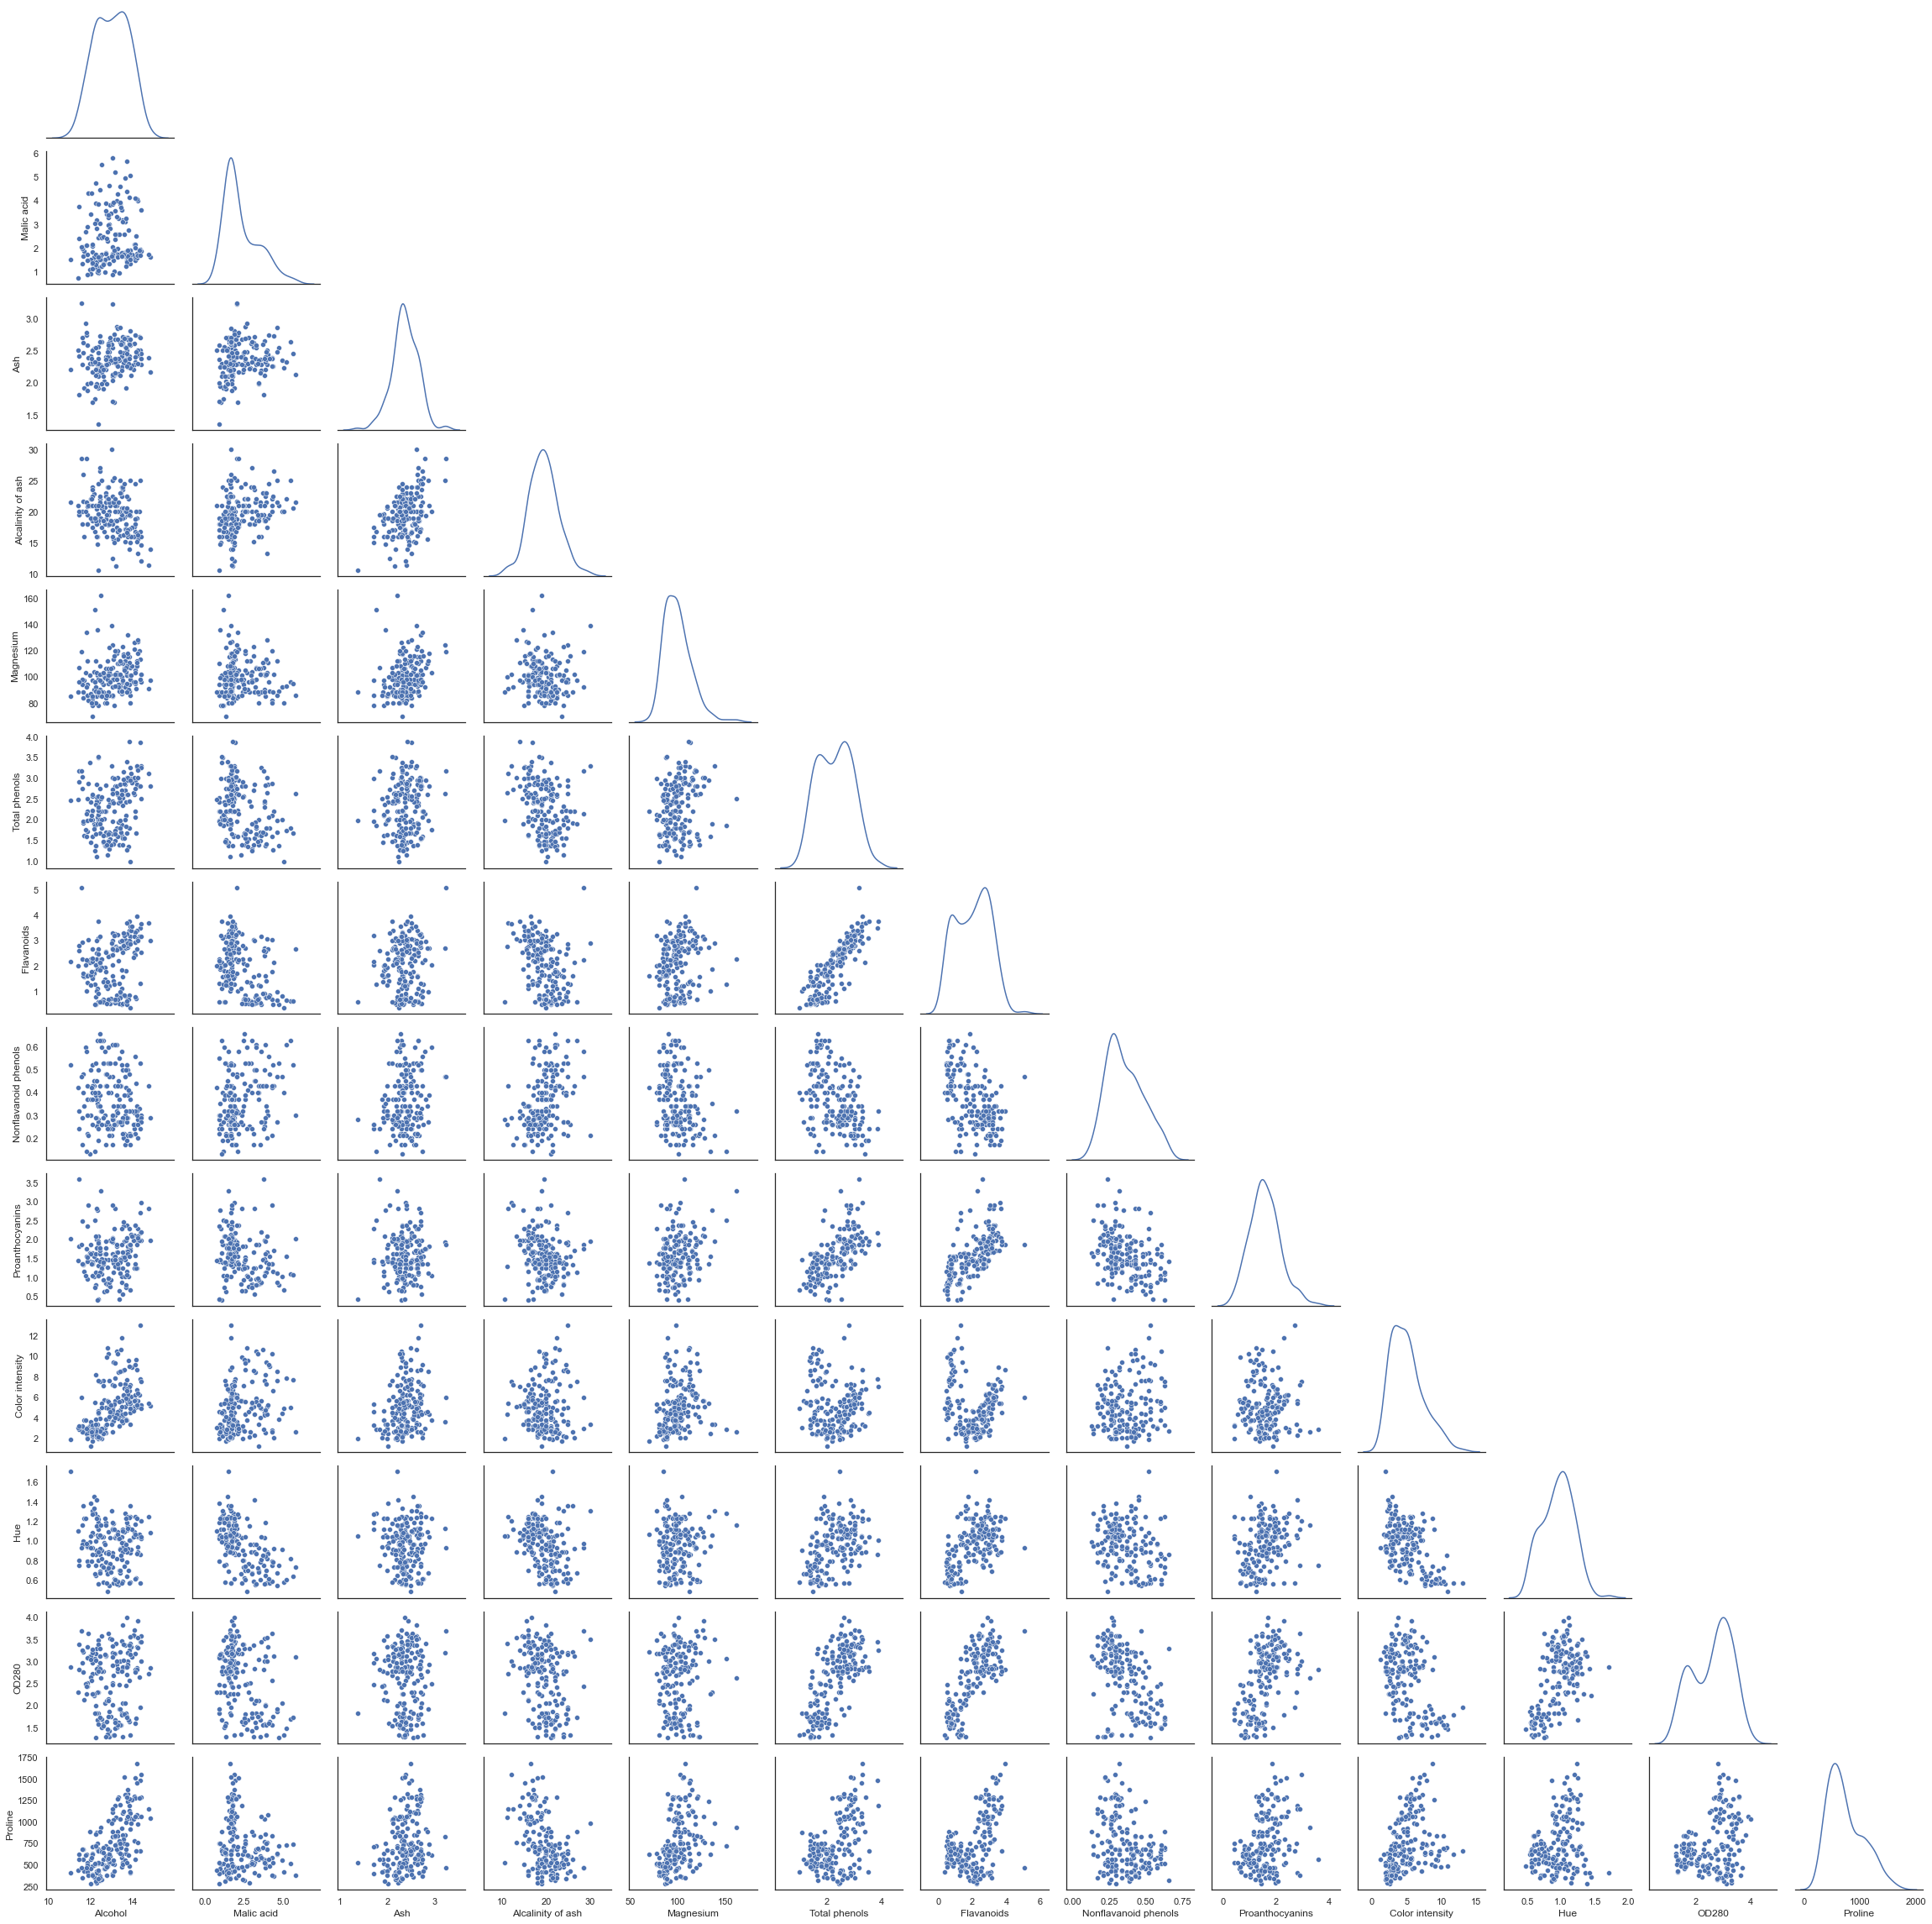

In [116]:
# Plotting df using Pairgrid to visualize correlation coefficient

g = sns.PairGrid(df, diag_sharey=False, corner=True)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


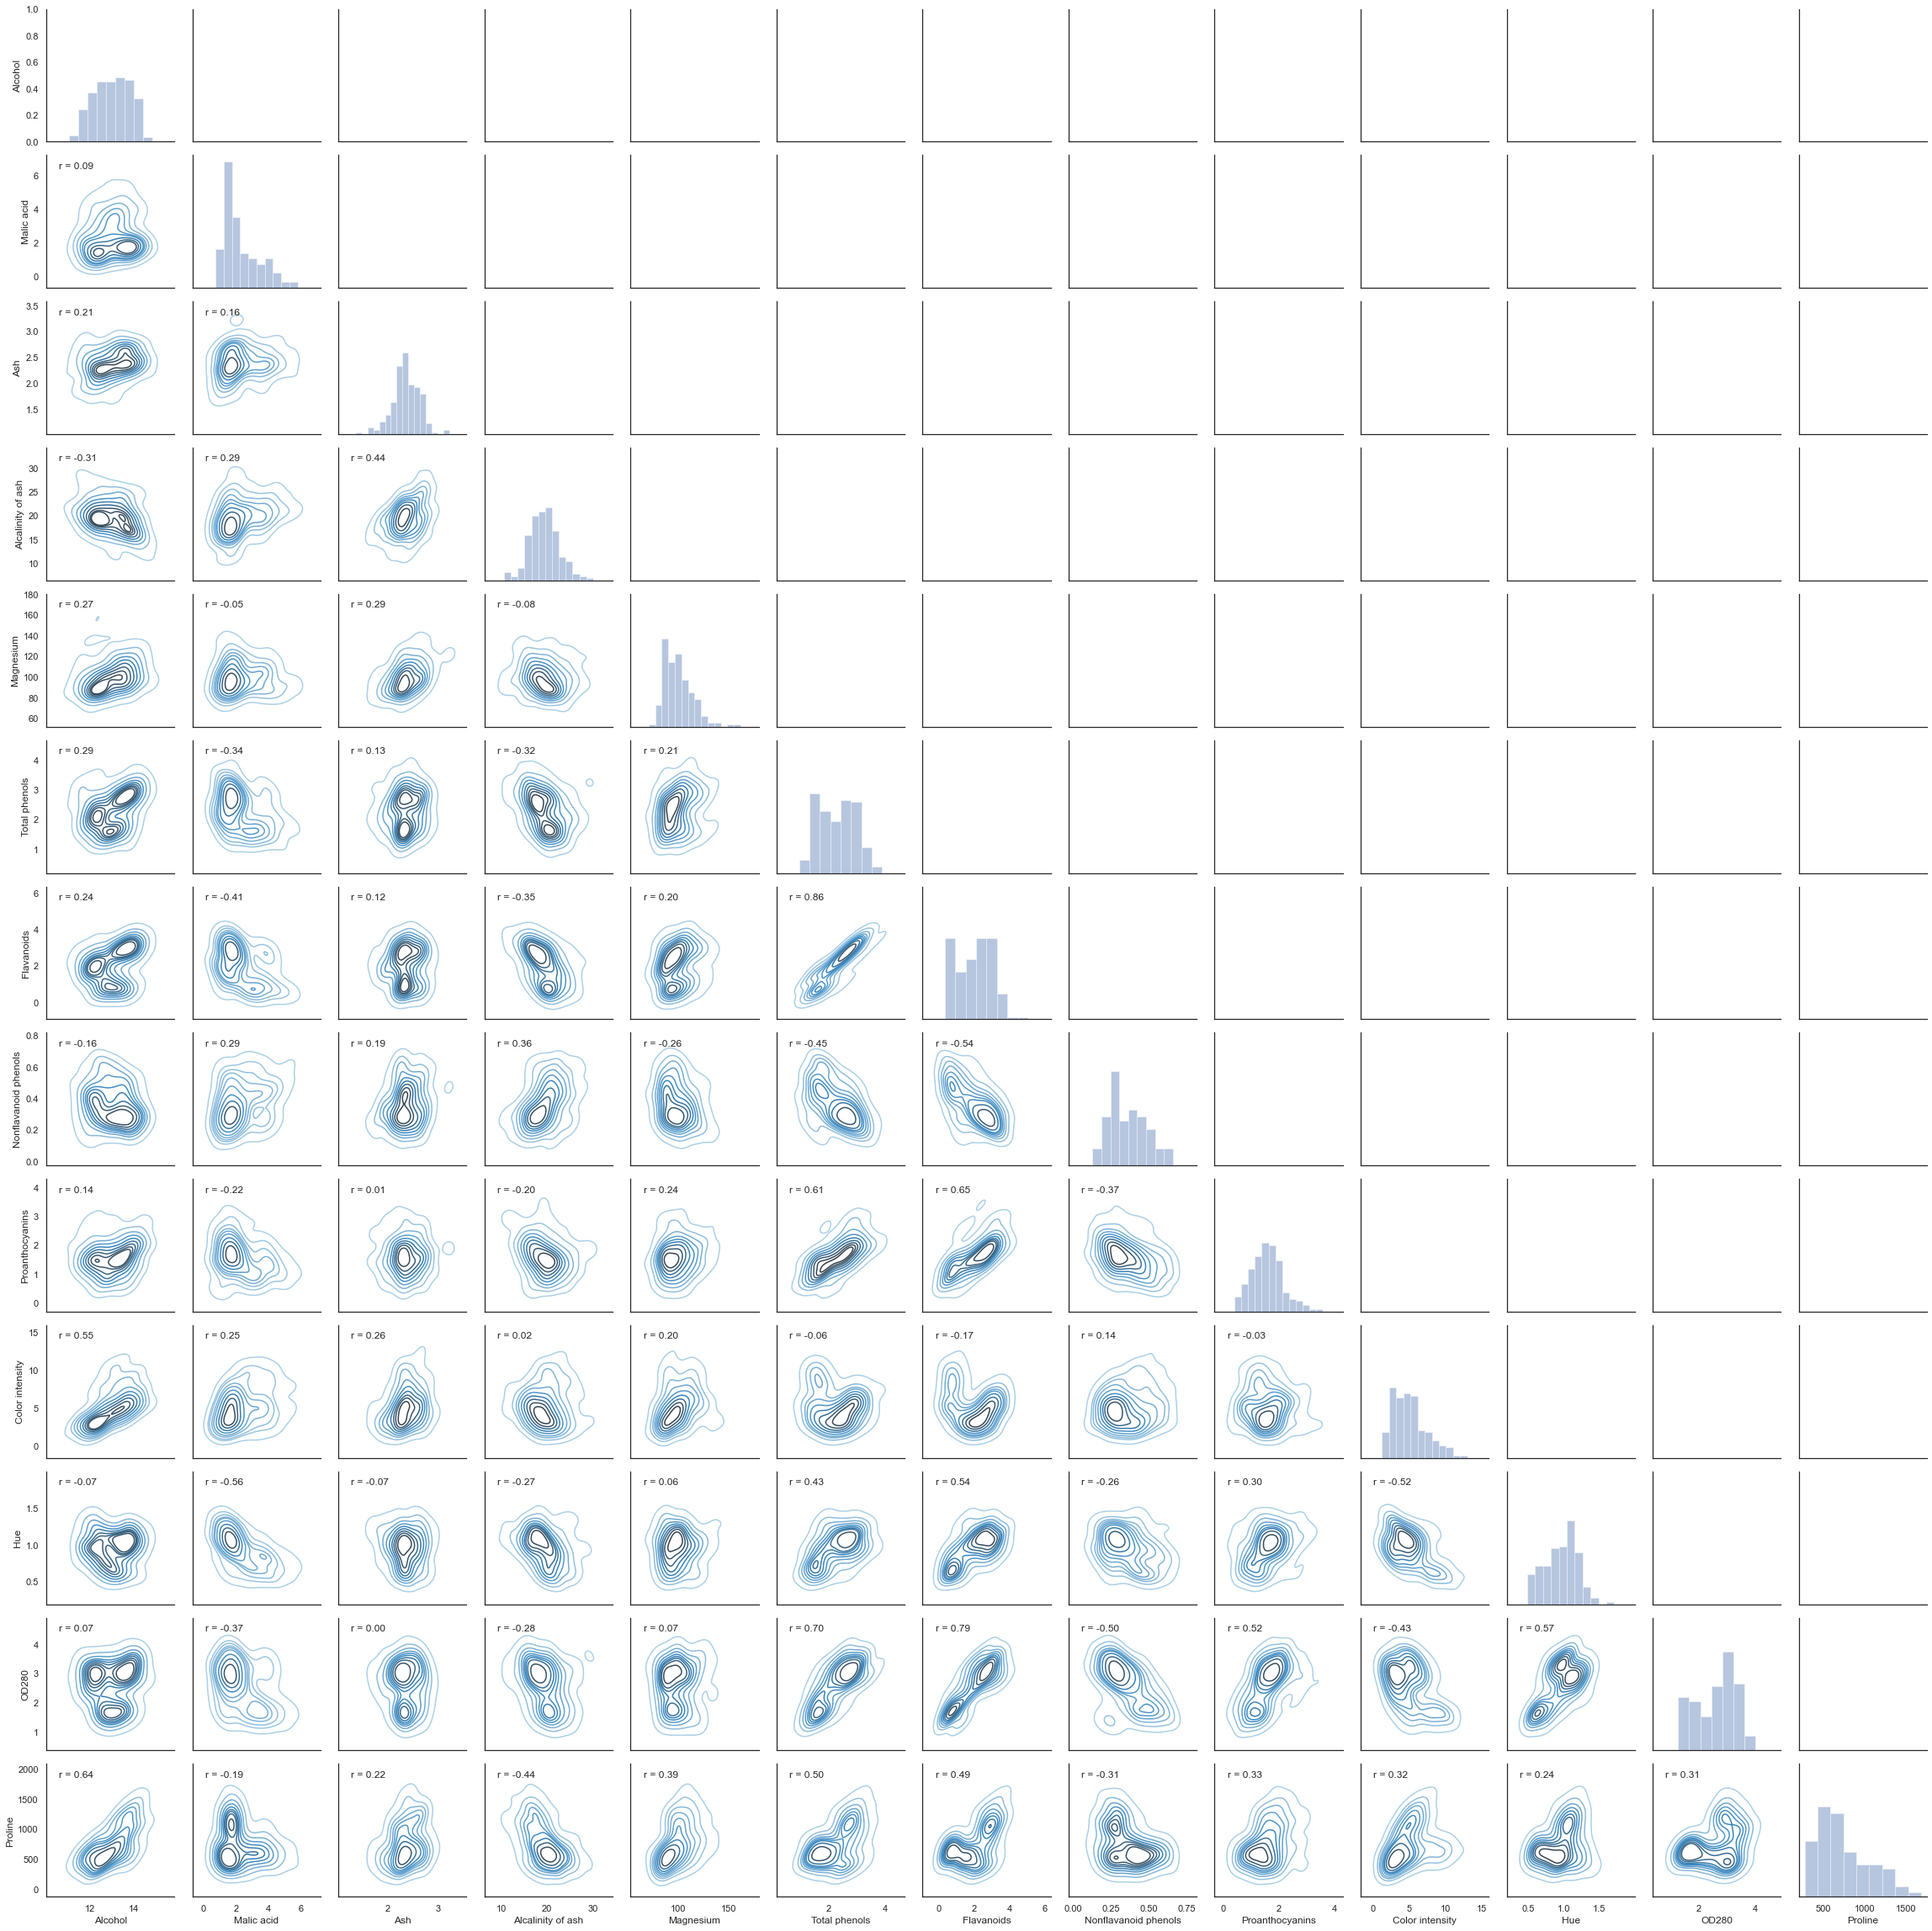

In [117]:
# stealing code from stackoverflow to display r (pls don't deduct my mark :(, I only do this to show r in the below pairgrid)
# also if possible pls give my some comment on which part do what :)

sns.set(style="white")

mean = np.zeros(3)
cov = np.random.uniform(.2, .4, (3, 3))
cov += cov.T
cov[np.diag_indices(3)] = 1
data = np.random.multivariate_normal(mean, cov, 100)
df = pd.DataFrame(df)

def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)

g = sns.PairGrid(df, palette=["red"])
g.map_diag(sns.distplot, kde=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_lower(corrfunc)

In [118]:
# According to Investopedia: "Correlation coefficient values less than +0.8 or greater than -0.8 are not considered significant"
# Therefor, in conclusion, there's only 1 noteable (significant) relationship, which is between Flavanoid and Total phenols with the correlation coefficient of 0.86

In [119]:
# getting all the correlation
df.corr()

Alcohol  Malic acid       Ash  Alcalinity of ash  \
Alcohol               1.000000    0.094397  0.211545          -0.310235   
Malic acid            0.094397    1.000000  0.164045           0.288500   
Ash                   0.211545    0.164045  1.000000           0.443367   
Alcalinity of ash    -0.310235    0.288500  0.443367           1.000000   
Magnesium             0.270798   -0.054575  0.286587          -0.083333   
Total phenols         0.289101   -0.335167  0.128980          -0.321113   
Flavanoids            0.236815   -0.411007  0.115077          -0.351370   
Nonflavanoid phenols -0.155929    0.292977  0.186230           0.361922   
Proanthocyanins       0.136698   -0.220746  0.009652          -0.197327   
Color intensity       0.546364    0.248985  0.258887           0.018732   
Hue                  -0.071747   -0.561296 -0.074667          -0.273955   
OD280                 0.072343   -0.368710  0.003911          -0.276769   
Proline               0.643720   -0.192011  0.223626          -0.440597   

                      Magnesium  Total phenols  Flavanoids  \
Alcohol                0.270798       0.289101    0.236815   
Malic acid            -0.054575      -0.335167   -0.411007   
Ash                    0.286587       0.128980    0.115077   
Alcalinity of ash     -0.083333      -0.321113   -0.351370   
Magnesium              1.000000       0.214401    0.195784   
Total phenols          0.214401       1.000000    0.864564   
Flavanoids             0.195784       0.864564    1.000000   
Nonflavanoid phenols  -0.256294      -0.449935   -0.537900   
Proanthocyanins        0.236441       0.612413    0.652692   
Color intensity        0.199950      -0.055136   -0.172379   
Hue                    0.055398       0.433681    0.543479   
OD280                  0.066004       0.699949    0.787194   
Proline                0.393351       0.498115    0.494193   

                      Nonflavanoid phenols  Proanthocyanins  Color intensity  \
Alcohol                          -0.155929         0.136698         0.546364   
Malic acid                        0.292977        -0.220746         0.248985   
Ash                               0.186230         0.009652         0.258887   
Alcalinity of ash                 0.361922        -0.197327         0.018732   
Magnesium                        -0.256294         0.236441         0.199950   
Total phenols                    -0.449935         0.612413        -0.055136   
Flavanoids                       -0.537900         0.652692        -0.172379   
Nonflavanoid phenols              1.000000        -0.365845         0.139057   
Proanthocyanins                  -0.365845         1.000000        -0.025250   
Color intensity                   0.139057        -0.025250         1.000000   
Hue                              -0.262640         0.295544        -0.521813   
OD280                            -0.503270         0.519067        -0.428815   
Proline                          -0.311385         0.330417         0.316100   

                           Hue     OD280   Proline  
Alcohol              -0.071747  0.072343  0.643720  
Malic acid           -0.561296 -0.368710 -0.192011  
Ash                  -0.074667  0.003911  0.223626  
Alcalinity of ash    -0.273955 -0.276769 -0.440597  
Magnesium             0.055398  0.066004  0.393351  
Total phenols         0.433681  0.699949  0.498115  
Flavanoids            0.543479  0.787194  0.494193  
Nonflavanoid phenols -0.262640 -0.503270 -0.311385  
Proanthocyanins       0.295544  0.519067  0.330417  
Color intensity      -0.521813 -0.428815  0.316100  
Hue                   1.000000  0.565468  0.236183  
OD280                 0.565468  1.000000  0.312761  
Proline               0.236183  0.312761  1.000000

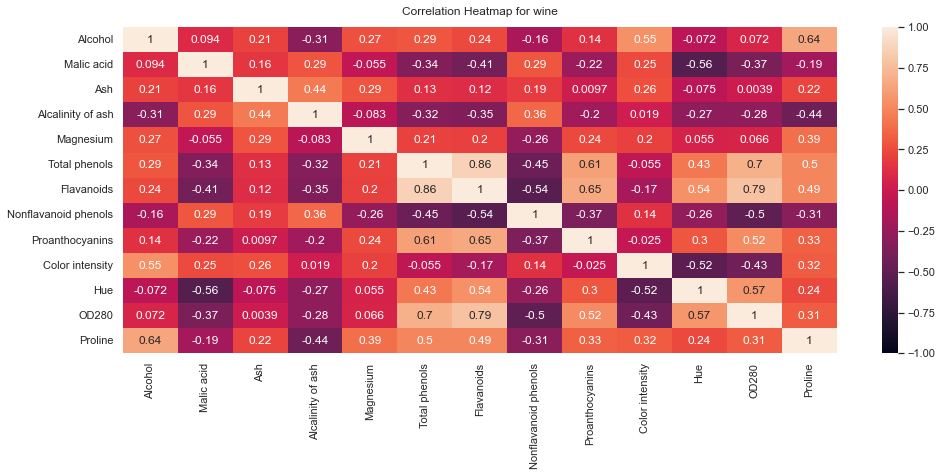

In [120]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap for wine', fontdict={'fontsize':12}, pad=12);

In [121]:
# 3 pair of attributes that has the largest correlation:
# 1. Flavanoids & total phenois with r = 0.86
# 2. Flavanoids & OD280 with r = 0.79
# 3. OD280 & total phenois with r = 0.7

In [127]:
import sklearn.cluster as cluster

kmeans = cluster.KMeans(n_clusters = 3, random_state=0)
kmeans = kmeans.fit(df)

In [128]:
kmeans.cluster_centers_ # figure out where the centerpoints are

array([[1.29298387e+01, 2.50403226e+00, 2.40806452e+00, 1.98903226e+01,
        1.03596774e+02, 2.11112903e+00, 1.58403226e+00, 3.88387097e-01,
        1.50338710e+00, 5.65032258e+00, 8.83967742e-01, 2.36548387e+00,
        7.28338710e+02],
       [1.38044681e+01, 1.88340426e+00, 2.42617021e+00, 1.70234043e+01,
        1.05510638e+02, 2.86723404e+00, 3.01425532e+00, 2.85319149e-01,
        1.91042553e+00, 5.70255319e+00, 1.07829787e+00, 3.11404255e+00,
        1.19514894e+03],
       [1.25166667e+01, 2.49420290e+00, 2.28855072e+00, 2.08231884e+01,
        9.23478261e+01, 2.07072464e+00, 1.75840580e+00, 3.90144928e-01,
        1.45188406e+00, 4.08695651e+00, 9.41159420e-01, 2.49072464e+00,
        4.58231884e+02]])

In [130]:
df["cluster"] = kmeans.labels_

In [131]:
df

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
0     3.92     1065        1  
1     3.40     1050        1  
2     3.17     1185        1  
3     3.45     1480        1  
4     2.93      735        0  
..     ...      ...      ...  
173   1.74      740        0  
174   1.56      750        0  
175   1.56      835        0  
176   1.62      840        0  
177   1.60      560        2  

[178 rows x 14 columns]

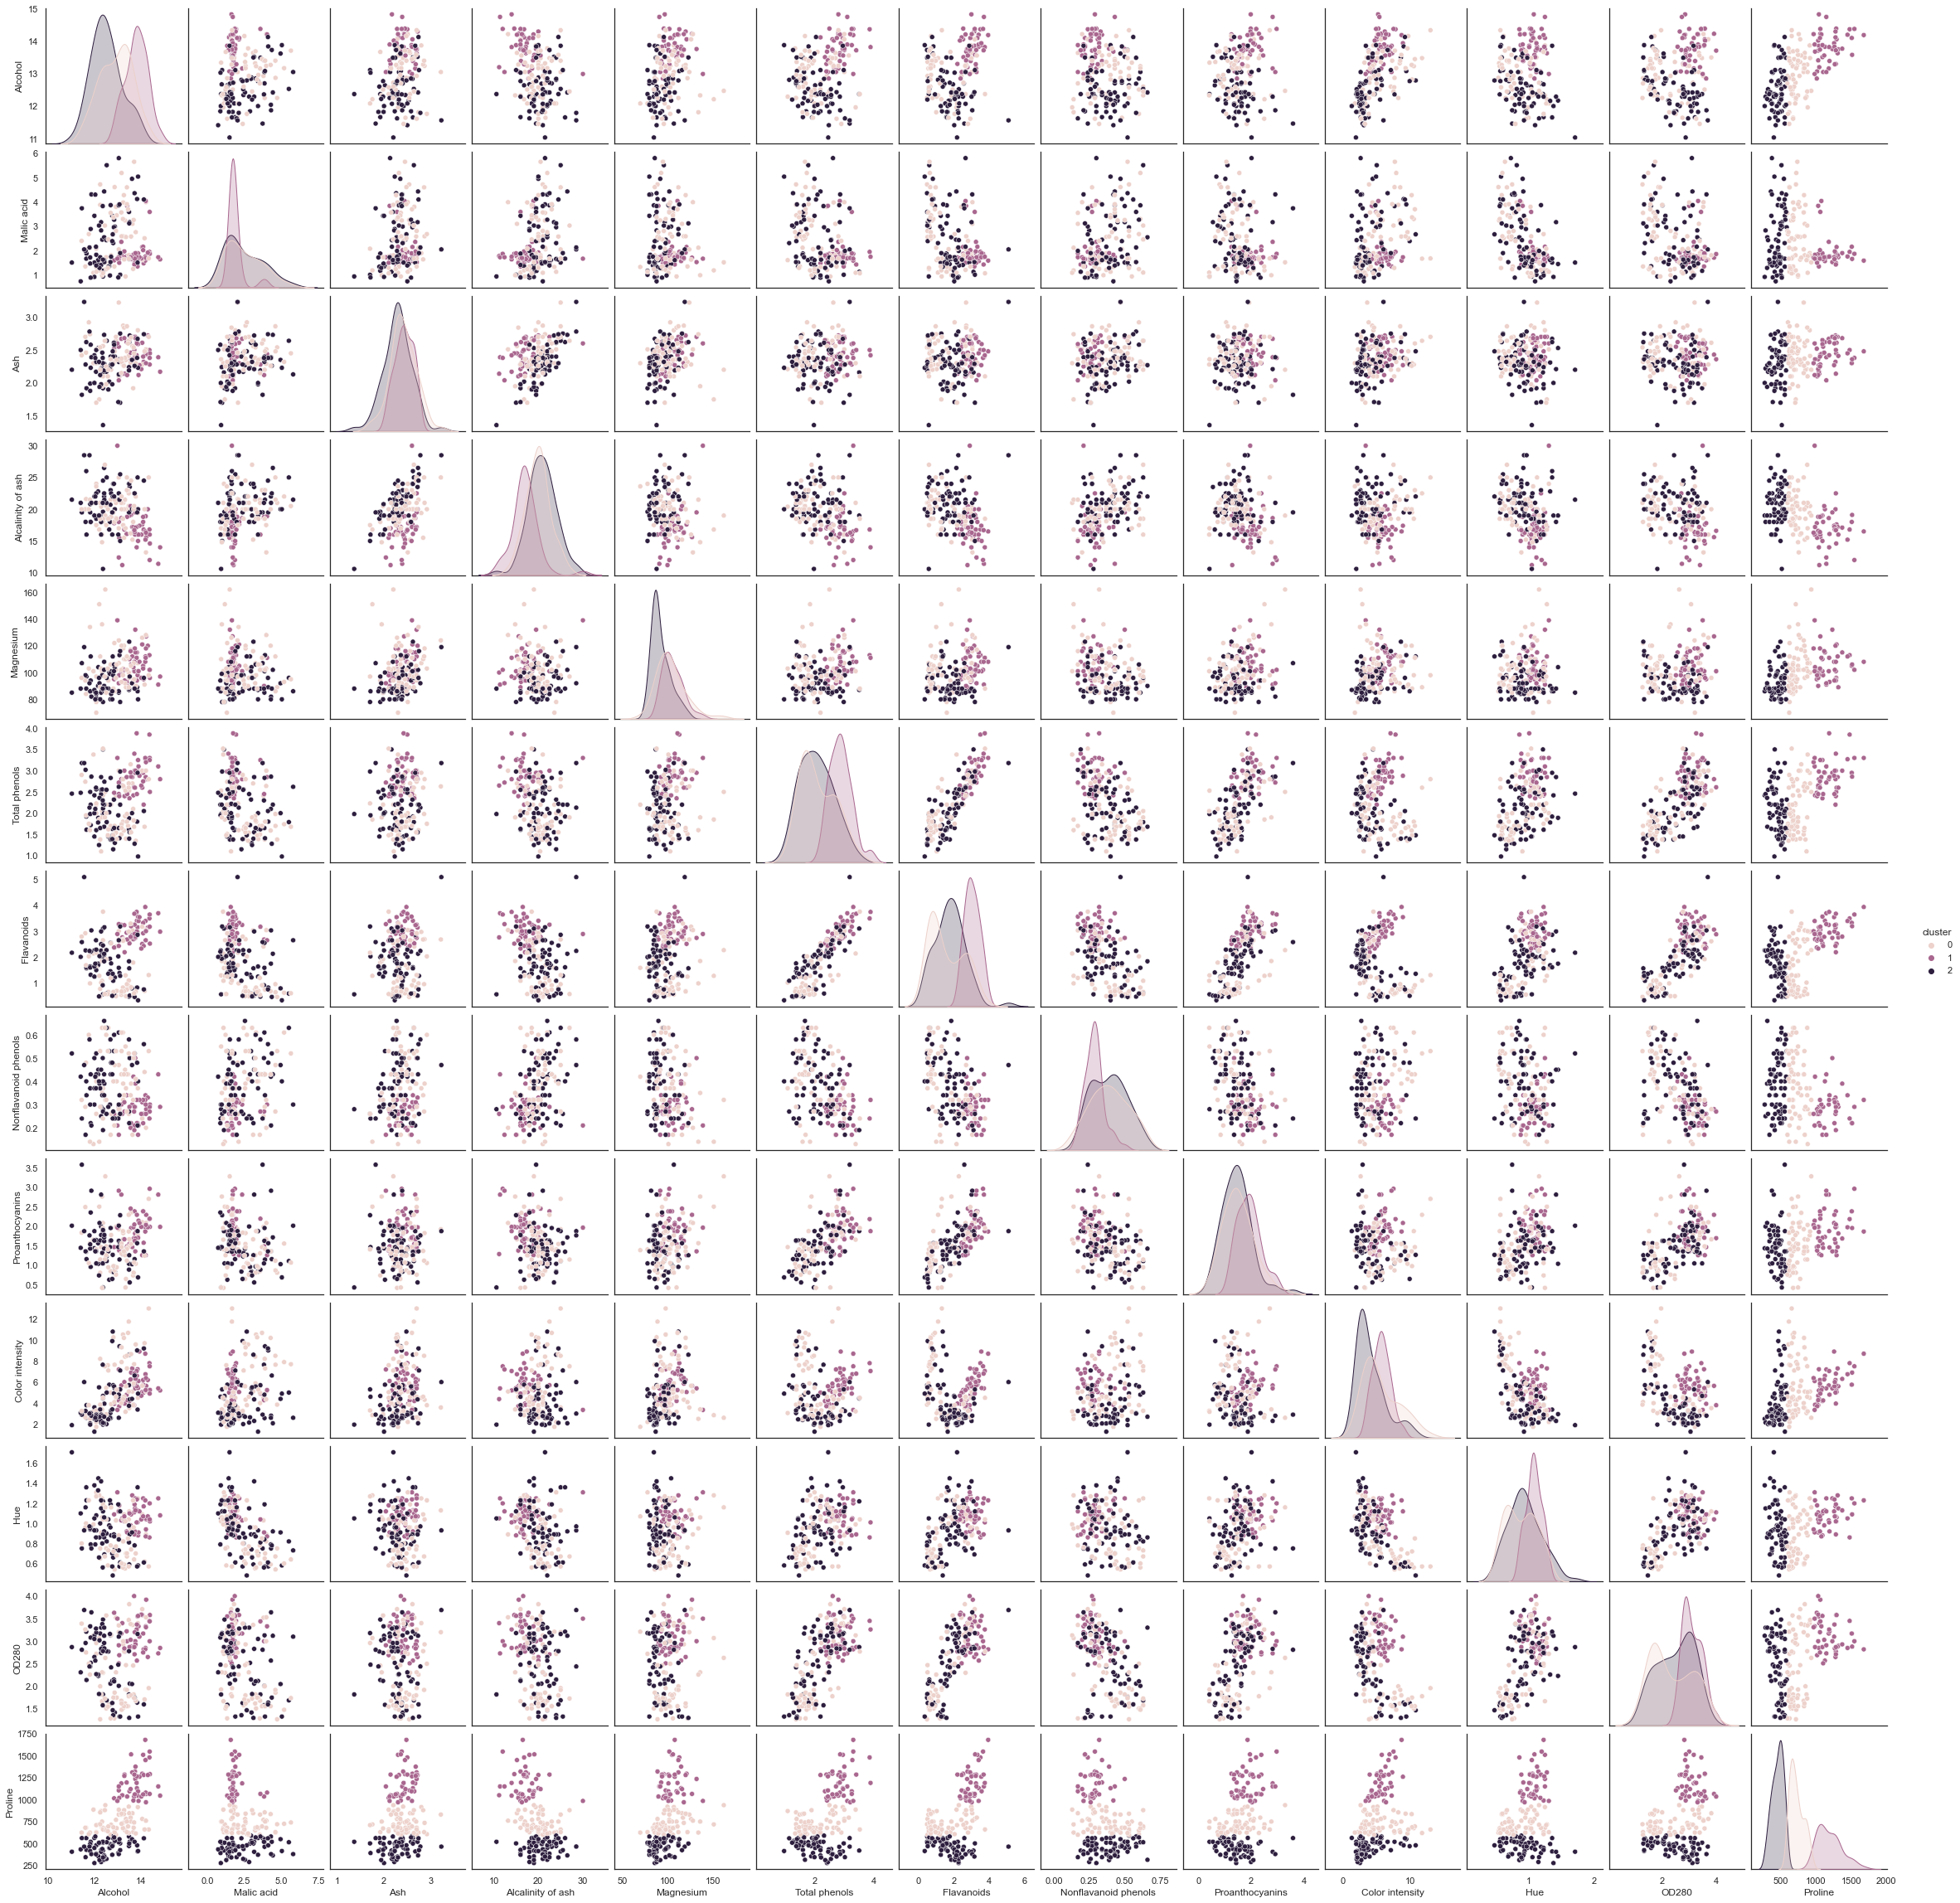

In [132]:
sns_plot = sns.pairplot(df, hue = "cluster")

In [133]:
df

Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
0      14.23        1.71  2.43               15.6        127           2.80   
1      13.20        1.78  2.14               11.2        100           2.65   
2      13.16        2.36  2.67               18.6        101           2.80   
3      14.37        1.95  2.50               16.8        113           3.85   
4      13.24        2.59  2.87               21.0        118           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5         95           1.68   
174    13.40        3.91  2.48               23.0        102           1.80   
175    13.27        4.28  2.26               20.0        120           1.59   
176    13.17        2.59  2.37               20.0        120           1.65   
177    14.13        4.10  2.74               24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity   Hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     OD280  Proline  cluster  
0     3.92     1065        1  
1     3.40     1050        1  
2     3.17     1185        1  
3     3.45     1480        1  
4     2.93      735        0  
..     ...      ...      ...  
173   1.74      740        0  
174   1.56      750        0  
175   1.56      835        0  
176   1.62      840        0  
177   1.60      560        2  

[178 rows x 14 columns]

In [138]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler().fit(df)

In [141]:
X_scaled_array = standardScaler.transform(df)
normalizedData = pd.DataFrame(X_scaled_array, columns = df.columns)

In [143]:
normalizedData

Alcohol  Malic acid       Ash  Alcalinity of ash  Magnesium  \
0    1.518613   -0.562250  0.232053          -1.169593   1.913905   
1    0.246290   -0.499413 -0.827996          -2.490847   0.018145   
2    0.196879    0.021231  1.109334          -0.268738   0.088358   
3    1.691550   -0.346811  0.487926          -0.809251   0.930918   
4    0.295700    0.227694  1.840403           0.451946   1.281985   
..        ...         ...       ...                ...        ...   
173  0.876275    2.974543  0.305159           0.301803  -0.332922   
174  0.493343    1.412609  0.414820           1.052516   0.158572   
175  0.332758    1.744744 -0.389355           0.151661   1.422412   
176  0.209232    0.227694  0.012732           0.151661   1.422412   
177  1.395086    1.583165  1.365208           1.502943  -0.262708   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0         0.808997    1.034819             -0.659563         1.224884   
1         0.568648    0.733629             -0.820719        -0.544721   
2         0.808997    1.215533             -0.498407         2.135968   
3         2.491446    1.466525             -0.981875         1.032155   
4         0.808997    0.663351              0.226796         0.401404   
..             ...         ...                   ...              ...   
173      -0.985614   -1.424900              1.274310        -0.930179   
174      -0.793334   -1.284344              0.549108        -0.316950   
175      -1.129824   -1.344582              0.549108        -0.422075   
176      -1.033684   -1.354622              1.354888        -0.229346   
177      -0.392751   -1.274305              1.596623        -0.422075   

     Color intensity       Hue     OD280   Proline   cluster  
0           0.251717  0.362177  1.847920  1.013009 -0.045889  
1          -0.293321  0.406051  1.113449  0.965242 -0.045889  
2           0.269020  0.318304  0.788587  1.395148 -0.045889  
3           1.186068 -0.427544  1.184071  2.334574 -0.045889  
4          -0.319276  0.362177  0.449601 -0.037874 -1.212782  
..               ...       ...       ...       ...       ...  
173         1.142811 -1.392758 -1.231206 -0.021952 -1.212782  
174         0.969783 -1.129518 -1.485445  0.009893 -1.212782  
175         2.224236 -1.612125 -1.485445  0.280575 -1.212782  
176         1.834923 -1.568252 -1.400699  0.296498 -1.212782  
177         1.791666 -1.524378 -1.428948 -0.595160  1.121004  

[178 rows x 14 columns]

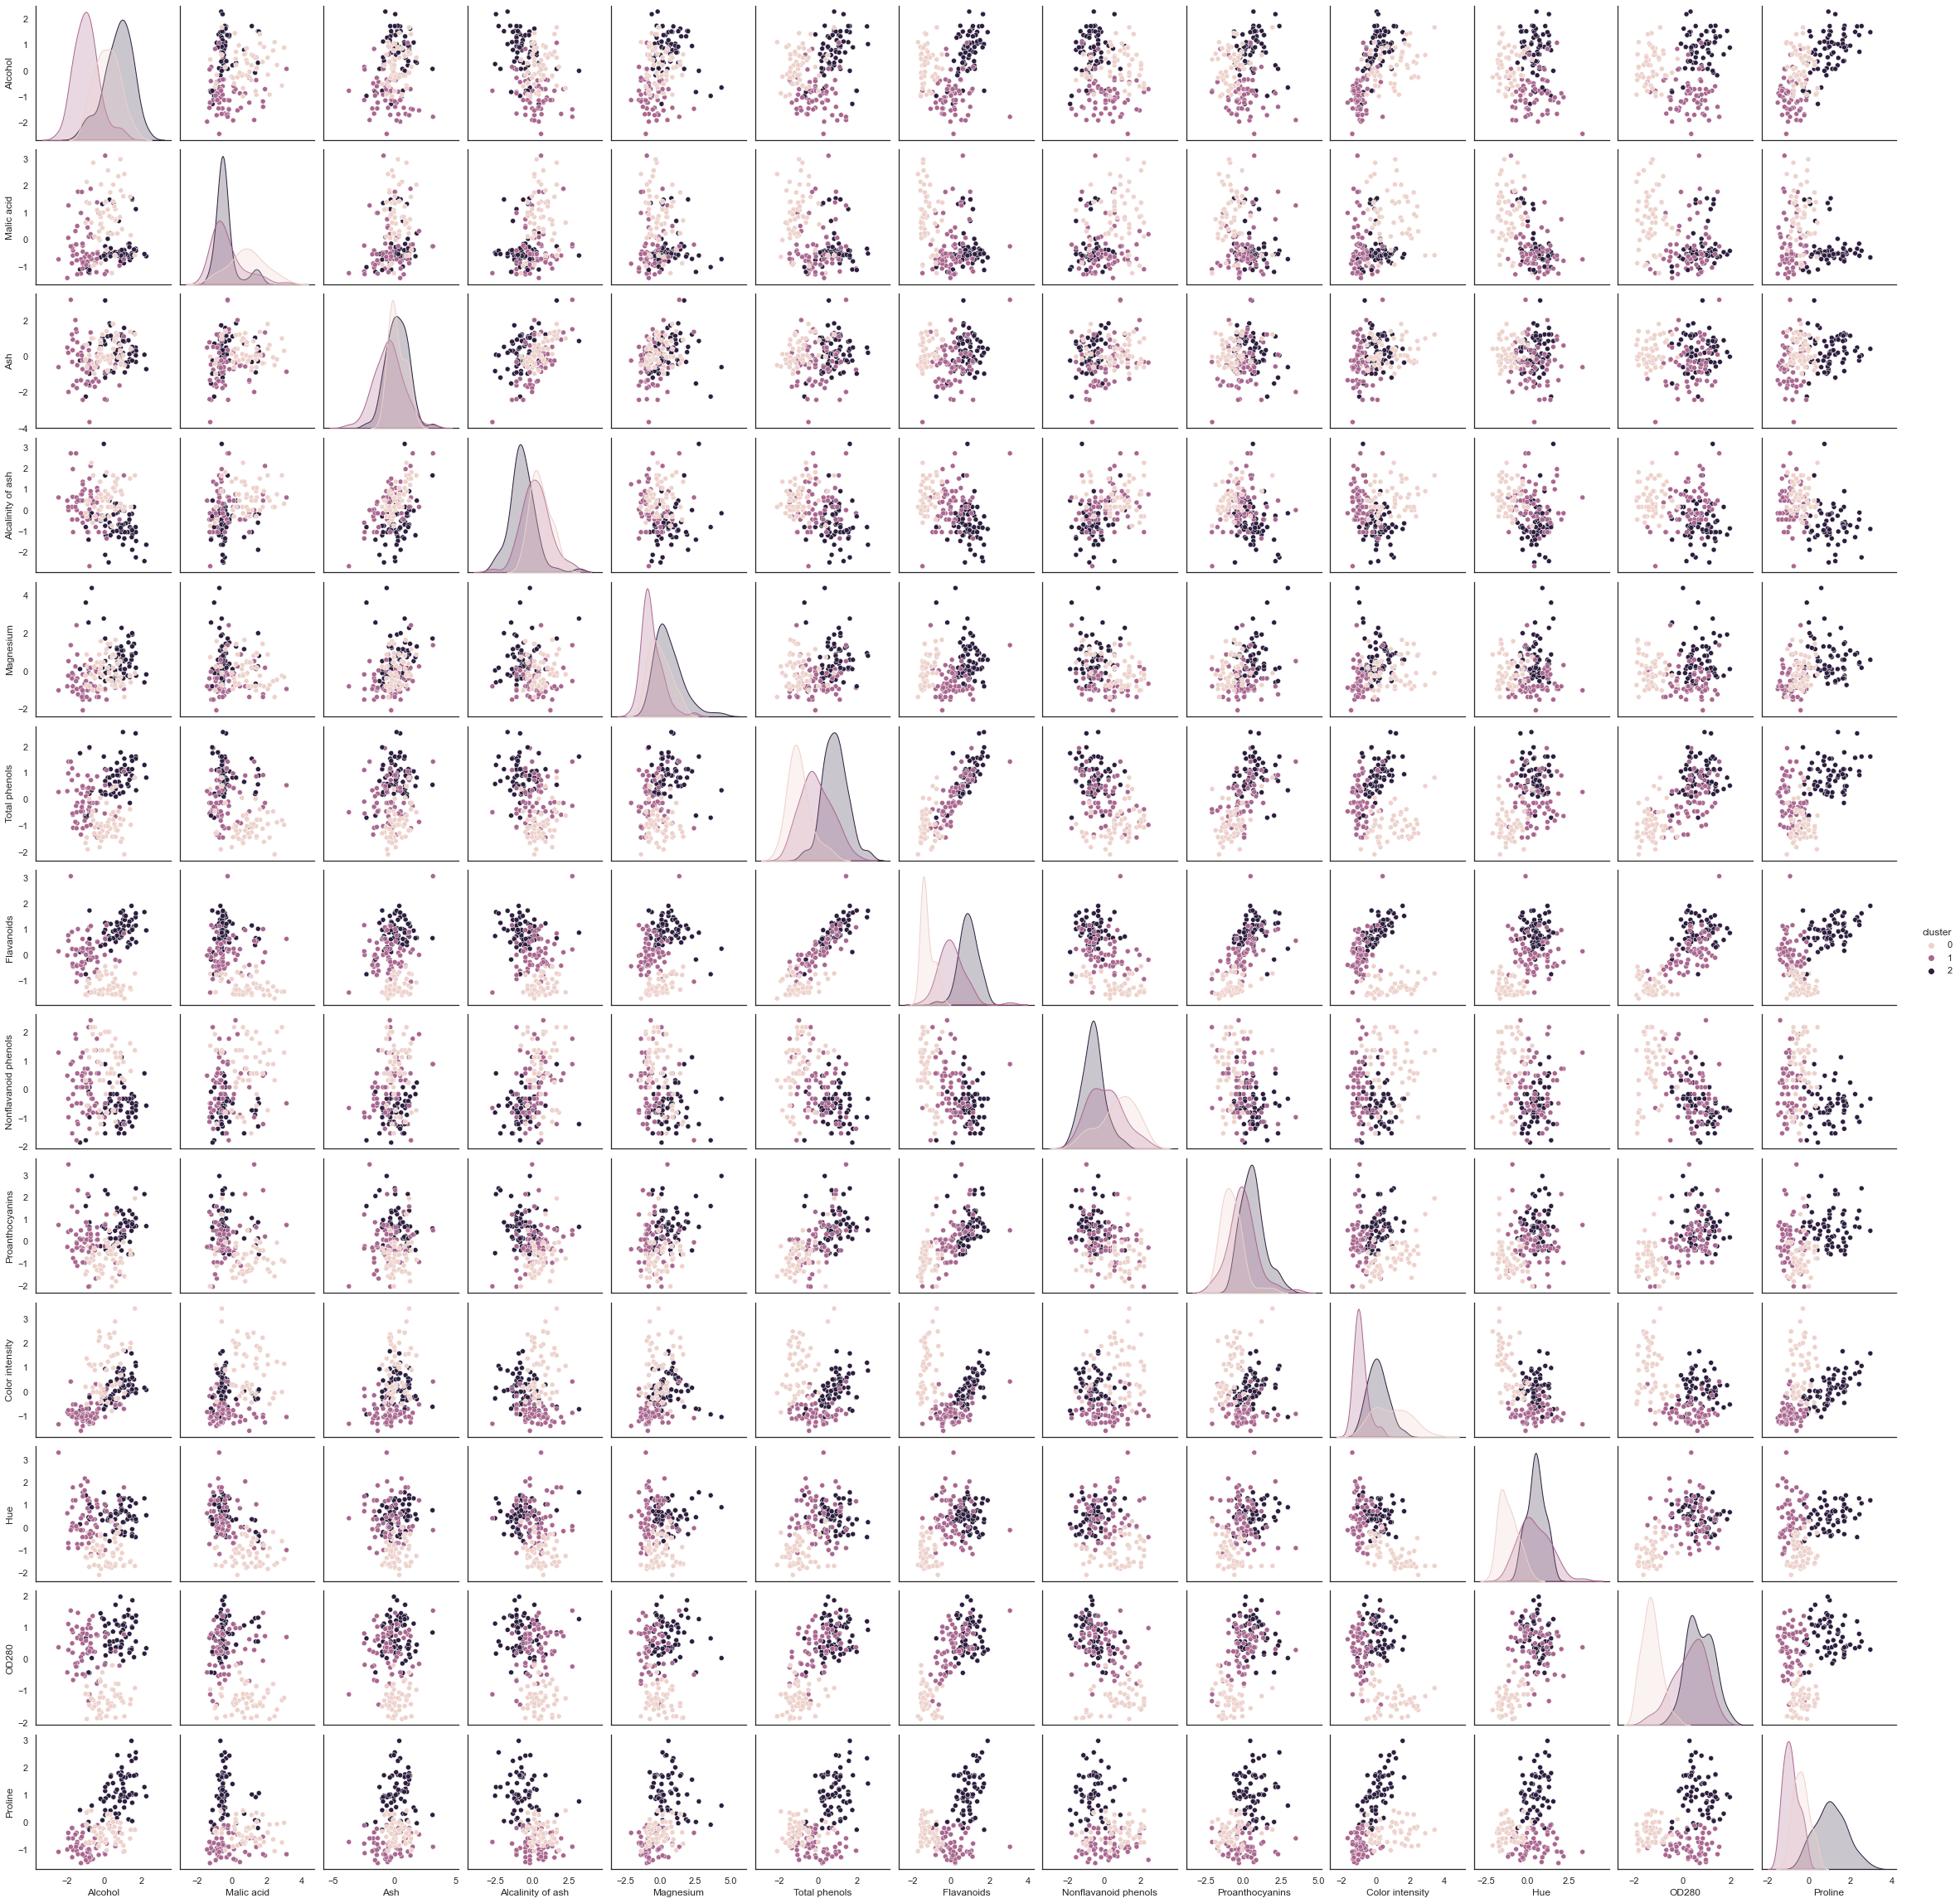

In [144]:
# pair plotting again, but now with normalized data (normalized df)

kmeans = cluster.KMeans(n_clusters = 3, random_state=0)
kmeans = kmeans.fit(normalizedData)
kmeans.cluster_centers_ # figure out where the centerpoints are
normalizedData["cluster"] = kmeans.labels_
sns_plot = sns.pairplot(normalizedData, hue = "cluster")